<a href="https://colab.research.google.com/github/y-joshi/hackathon-rp-impl/blob/main/ASE_RP_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import datetime
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image, HTML

import time
from datetime import datetime, timedelta

In [ ]:
# Load Data
HackDF = pd.read_csv('/content/drive/MyDrive/ASE_RP_IMPLEMENTATAION/Data/devpost-hackathons.csv',sep=',')
hbacDF = pd.read_csv('/content/drive/MyDrive/ASE_RP_IMPLEMENTATAION/Data/b2a.csv',sep=';', encoding = "ISO-8859-1")
hcbDF = pd.read_csv('/content/drive/MyDrive/ASE_RP_IMPLEMENTATAION/Data/c2b.csv',sep=';')
hpcDF = pd.read_csv('/content/drive/MyDrive/ASE_RP_IMPLEMENTATAION/Data/p2c.csv',sep=';')
wocURLDF = pd.read_csv('/content/drive/MyDrive/ASE_RP_IMPLEMENTATAION/Data/woc-urls.csv',sep=',')
hpaDF = pd.read_csv('/content/drive/MyDrive/ASE_RP_IMPLEMENTATAION/Data/p2a.csv',sep=';')
#p2aDF = pd.read_csv('SampleData/p2aFirst.csv', sep= ';')
#c2PLinesDF = pd.read_csv('SampleData/c2PFirst.csv', sep=';')
#AuthorsMergeMap = pd.read_csv('SampleData/AuthorsMergeMap', sep=';')
prog_blobs = pd.read_csv('/content/drive/MyDrive/ASE_RP_IMPLEMENTATAION/Data/Bs')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
HackDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   devpost_id    101 non-null    object
 1   github_url    101 non-null    object
 2   ProjectID     101 non-null    object
 3   hackathon_id  101 non-null    object
 4   end_date      101 non-null    object
dtypes: object(5)
memory usage: 4.1+ KB


In [ ]:
# Prepare hackathon info
df = HackDF[['devpost_id','hackathon_id','end_date']]
df.rename(columns = {'devpost_id':'devpostID', 'hackathon_id':'hackathonID', 'end_date':'hackathonEndDate'}, inplace = True) 

In [ ]:
# Prepare hackathon info ( Calculate Start Date)

df['hackathonStartDate'] = df.apply(lambda row: datetime.strptime(row.hackathonEndDate, '%Y-%m-%d') - timedelta(days=2), axis=1)
HackDuration = df

In [ ]:
HackDuration

,devpostID,hackathonID,hackathonEndDate,hackathonStartDate
0,slapstick,makeschool,2017-05-21,2017-05-19
1,classpage,yhack2016,2016-11-13,2016-11-11
2,project-sona,nwhacks2018,2018-01-14,2018-01-12
3,shetechs,shehacksboston,2018-01-28,2018-01-26
4,vanhackathon-mastermind,vanhackathon,2016-05-22,2016-05-20
...,...,...,...,...
96,unicorn-io,treehacks-2018,2018-02-18,2018-02-16
97,dev-icons,local-hack-day-iv,2017-12-03,2017-12-01
98,nightout-lkd6iq,hackthenorth2017,2017-09-17,2017-09-15
99,pal-it,sheinnovates16,2016-01-31,2016-01-29


In [ ]:
# Filter only Code Blobs by Github Lingustic tool

hbacDFWCommon = pd.merge(hbacDF, prog_blobs, how='inner', left_on=['BlobHash'], right_on=['Blob'])
hbacDFWCommon

,BlobHash,FirstTimestamp,FirstAuthorID,FirstCommitHash,Blob
0,000024522f9bc6809ddcafe968b71b8070c69f6f,2017-12-01 23:57:06,blisswho <blisswho@yahoo.com>,9f696320598cb2a597382175e809f2cdc1485e92,000024522f9bc6809ddcafe968b71b8070c69f6f
1,00002f16446f80b67312501ba0bfe4efd1cd8af8,2015-02-20 11:58:46,Khoa Ngo <khoa@eardish.com>,dac12efa4dc1bc01b64152c919c2e7e6a755a2b1,00002f16446f80b67312501ba0bfe4efd1cd8af8
2,000039415023803112588daffe1e21aaa479064c,2019-08-09 20:12:56,dugarte@pernix-solutions.com <dugarte@pernix-s...,cb1347fb27a5b6ed9ac634a1840442d52cd1cac1,000039415023803112588daffe1e21aaa479064c
3,00005ef0aa075b8e8b3659e598e5ac7844ec3126,2016-10-21 18:27:40,Igor Minar <iminar@google.com>,4269f303572b7c25e2cb48505ad9582d97bd8d0f,00005ef0aa075b8e8b3659e598e5ac7844ec3126
4,000060b91af89e7dc37351c57059d7bba5d83f16,2014-12-27 04:58:41,Aman Babra <ababra@gmail.com>,527dd9ead64e7610d2cf0600b288c1b9f4dfe5d4,000060b91af89e7dc37351c57059d7bba5d83f16
...,...,...,...,...,...
106276,fffe6a53bad994d1b6f32f1be351eb961aa525da,2018-12-05 23:09:07,David Barton <david.barton309@gmail.com>,3a67fef3e26689ff293e86691fa4a01a1dd73c2b,fffe6a53bad994d1b6f32f1be351eb961aa525da
106277,fffea7e43ea8c7ecec76a9beb820e7d796201adf,2014-11-04 01:36:14,Sabrina Tjeng <sabriele@users.noreply.github.com>,e12a1da45eddaf52721fc31eca4763b4a2b61176,fffea7e43ea8c7ecec76a9beb820e7d796201adf
106278,fffeb6bf27e81760d2828a73444d60c1989a92ea,2019-04-18 13:26:33,unknown <stav12212@gmail.com>,70d11dbcd9cea12749dd3b5b3783e8d4a905362b,fffeb6bf27e81760d2828a73444d60c1989a92ea
106279,fffefe722a3c2330ec448ca2406deca2f8f71740,2013-09-10 18:00:44,zeroed <edd.rossi@gmail.com>,09a22d5e3805d6ff591aa756b23772dc241514c2,fffefe722a3c2330ec448ca2406deca2f8f71740


In [ ]:
# Join Blobs with Hackathon Commits

BC = pd.merge(hbacDFWCommon, hcbDF, how='inner', left_on=['BlobHash'], right_on=['BlobHash'])[['BlobHash','CommitHash','FirstTimestamp','FirstAuthorID','FirstCommitHash']]
BC

,BlobHash,CommitHash,FirstTimestamp,FirstAuthorID,FirstCommitHash
0,000024522f9bc6809ddcafe968b71b8070c69f6f,9f696320598cb2a597382175e809f2cdc1485e92,2017-12-01 23:57:06,blisswho <blisswho@yahoo.com>,9f696320598cb2a597382175e809f2cdc1485e92
1,00002f16446f80b67312501ba0bfe4efd1cd8af8,484542366baa5c7d8a7305d1a7576979c1b28169,2015-02-20 11:58:46,Khoa Ngo <khoa@eardish.com>,dac12efa4dc1bc01b64152c919c2e7e6a755a2b1
2,00002f16446f80b67312501ba0bfe4efd1cd8af8,8ea6f92503b8e667fb7edef1e2425d15b612ad08,2015-02-20 11:58:46,Khoa Ngo <khoa@eardish.com>,dac12efa4dc1bc01b64152c919c2e7e6a755a2b1
3,000039415023803112588daffe1e21aaa479064c,e585ebed49af16763c3ee0608b849eb2a85fc1e8,2019-08-09 20:12:56,dugarte@pernix-solutions.com <dugarte@pernix-s...,cb1347fb27a5b6ed9ac634a1840442d52cd1cac1
4,00005ef0aa075b8e8b3659e598e5ac7844ec3126,18986671291c3394f36318991661f7c1d10a7b28,2016-10-21 18:27:40,Igor Minar <iminar@google.com>,4269f303572b7c25e2cb48505ad9582d97bd8d0f
...,...,...,...,...,...
202677,fffea7e43ea8c7ecec76a9beb820e7d796201adf,bde1b067c69dc0e7e7f5d05d6b1823c6a0905860,2014-11-04 01:36:14,Sabrina Tjeng <sabriele@users.noreply.github.com>,e12a1da45eddaf52721fc31eca4763b4a2b61176
202678,fffeb6bf27e81760d2828a73444d60c1989a92ea,52159fc4912b44b678c2af36dce0eaf6cbec70b7,2019-04-18 13:26:33,unknown <stav12212@gmail.com>,70d11dbcd9cea12749dd3b5b3783e8d4a905362b
202679,fffefe722a3c2330ec448ca2406deca2f8f71740,fcf49c60ab2f303d8438593d562f3facdaef513d,2013-09-10 18:00:44,zeroed <edd.rossi@gmail.com>,09a22d5e3805d6ff591aa756b23772dc241514c2
202680,ffff0dbc8225f6a7722fc66e3469574f2b1511fd,18986671291c3394f36318991661f7c1d10a7b28,2016-01-06 22:09:14,Allani <allanimohamedmahdi@gmail.com>,1cdc798b1d606cff9919474a71e51b492984c2c2


In [ ]:
# Join BC dataset with Hackathon projects

BCP = pd.merge(BC, hpcDF, how='inner', left_on=['CommitHash'], right_on=['CommitHash'])[['BlobHash','ProjectID','FirstTimestamp','FirstAuthorID','FirstCommitHash']].drop_duplicates()
BCP

,BlobHash,ProjectID,FirstTimestamp,FirstAuthorID,FirstCommitHash
0,000024522f9bc6809ddcafe968b71b8070c69f6f,scarletknight11_OperatAR,2017-12-01 23:57:06,blisswho <blisswho@yahoo.com>,9f696320598cb2a597382175e809f2cdc1485e92
1,000735319c11b598bacb0854e24735133c85c5cd,scarletknight11_OperatAR,2017-12-01 23:57:06,blisswho <blisswho@yahoo.com>,9f696320598cb2a597382175e809f2cdc1485e92
2,004c758a7be5332ffa5737b27c8e3c5ef92c5efd,scarletknight11_OperatAR,2016-02-22 08:42:25,Neil Mardosz <nmardosz@gmail.com>,635e53c14d34488f32c6ab08294fd25553d90ab2
3,0078af6583a39a96d9afa4151a0e19eb853ea1c1,scarletknight11_OperatAR,2017-10-12 09:37:24,abo <jaime.abollado94@gmail.com>,e54ee8962ba9731d4b91eb96167bb4dfc57a53c6
4,00c16cde50526aabc9a8096c543984c7c8261103,scarletknight11_OperatAR,2016-12-14 20:40:02,ScottSewell <scott.sewell@mail.mcgill.ca>,80f55df5a00727f1805f31ed703dd54c79345909
...,...,...,...,...,...
202676,ff016fc3b77cfadd322c6c644ca6f3d167a092ef,KCFindstr_Eye.ai,2018-03-31 18:34:29,Yuyang Huang <yuyangh@usc.edu>,112c5fcac478f0a94ea36809e9955673ce8a3a4a
202677,ff1829afef8b8fc5f26c2b104453bfef25072e38,yumikohey_EarningReport,2015-06-23 17:21:43,Yumiko Huang <dayumikoda@gmail.com>,c43b91d1344222a0e041541af6647c06f839d22e
202679,ff62a0a9ae6b5dd066133e876ce6ee82e8a80a07,musicmms_musicmms,2017-11-04 21:18:17,Ronit Sharma <sharmaronit009@gmail.com>,da6b84566fb4eba7808c532a7190c76ab4d33e0e
202680,ff73f6e437cd94f72ee500788f246dd2809093b5,musicmms_musicmms,2017-11-05 09:53:49,Shaunak Kale <epicshaunak@gmail.com>,aab8abfa4eb006ecbf0f13d60884de5881efc098


In [ ]:
# Join with wocURLs

BCP_DevPost = pd.merge(BCP, wocURLDF, how='inner', left_on=['ProjectID'], right_on=['ProjectID'])[['devpost_id','hackathon_id','ProjectID','BlobHash','FirstTimestamp','FirstAuthorID','FirstCommitHash']].drop_duplicates()

BCP_DevPost

,devpost_id,hackathon_id,ProjectID,BlobHash,FirstTimestamp,FirstAuthorID,FirstCommitHash
0,operatar,yhack2017,scarletknight11_OperatAR,000024522f9bc6809ddcafe968b71b8070c69f6f,2017-12-01 23:57:06,blisswho <blisswho@yahoo.com>,9f696320598cb2a597382175e809f2cdc1485e92
1,operatar,yhack2017,scarletknight11_OperatAR,000735319c11b598bacb0854e24735133c85c5cd,2017-12-01 23:57:06,blisswho <blisswho@yahoo.com>,9f696320598cb2a597382175e809f2cdc1485e92
2,operatar,yhack2017,scarletknight11_OperatAR,004c758a7be5332ffa5737b27c8e3c5ef92c5efd,2016-02-22 08:42:25,Neil Mardosz <nmardosz@gmail.com>,635e53c14d34488f32c6ab08294fd25553d90ab2
3,operatar,yhack2017,scarletknight11_OperatAR,0078af6583a39a96d9afa4151a0e19eb853ea1c1,2017-10-12 09:37:24,abo <jaime.abollado94@gmail.com>,e54ee8962ba9731d4b91eb96167bb4dfc57a53c6
4,operatar,yhack2017,scarletknight11_OperatAR,00c16cde50526aabc9a8096c543984c7c8261103,2016-12-14 20:40:02,ScottSewell <scott.sewell@mail.mcgill.ca>,80f55df5a00727f1805f31ed703dd54c79345909
...,...,...,...,...,...,...,...
125325,plan-my-trip,disruptsf2016,malavika94_PlanMyTrip,c2fdd4df937e30e0e3cd386e7725808401b0e889,2016-09-11 07:41:17,malavika94 <malavika94@yahoo.com.sg>,1af12173058f2235a34819a3a670befe904a31db
125326,plan-my-trip,disruptsf2016,malavika94_PlanMyTrip,c9e261227a19d75718d4dfd072d16a87ee2c205b,2016-09-11 07:41:17,malavika94 <malavika94@yahoo.com.sg>,1af12173058f2235a34819a3a670befe904a31db
125327,iican-tracker,mhacks8,tootap_Ol-Birty-Dastard---II,6808e5774c28fbdd50352d1b145d5add90305c0e,2016-10-09 09:50:52,tootap <ngeirland@gmail.com>,a6bb0808ac4cfe17fae74c6647847886b9ed0cc6
125328,gettothefood,deserthacks,rabn_GetToTheFood,c315a49280342bd14e2281547b9a59c0a549a410,2017-03-29 02:49:20,Prashanth R <prashanth@Prashanths-MacBook-Pro....,59ce7d37ce65bcddc47761695d78cbb668c0b281


In [ ]:
%%time
# Join with hackathon durations
compareDF = pd.merge(BCP_DevPost, HackDuration, how='inner', left_on=['devpost_id','hackathon_id'], right_on = ['devpostID','hackathonID'])[['devpost_id','hackathon_id','ProjectID','BlobHash','FirstTimestamp','FirstAuthorID','FirstCommitHash','hackathonStartDate','hackathonEndDate']].drop_duplicates()
compareDF


CPU times: user 231 ms, sys: 5.78 ms, total: 237 ms
Wall time: 240 ms


In [ ]:
# Fix timestamps for start/end dates

def addMaxTime(dcol):
    return str(dcol) + ' 23:59:59'
    
def addMinTime(dcol):
    return str(dcol) + ' 00:00:00'

compareDF['hackathonEndDate'] = compareDF['hackathonEndDate'].apply(addMaxTime)

compareDF['hackathonStartDate'] =  pd.to_datetime(compareDF['hackathonStartDate'], format='%Y-%m-%d %H:%M:%S')
compareDF['hackathonEndDate'] =  pd.to_datetime(compareDF['hackathonEndDate'], format='%Y-%m-%d %H:%M:%S')
# compareDF.info()
compareDF

,devpost_id,hackathon_id,ProjectID,BlobHash,FirstTimestamp,FirstAuthorID,FirstCommitHash,hackathonStartDate,hackathonEndDate
0,operatar,yhack2017,scarletknight11_OperatAR,000024522f9bc6809ddcafe968b71b8070c69f6f,2017-12-01 23:57:06,blisswho <blisswho@yahoo.com>,9f696320598cb2a597382175e809f2cdc1485e92,2017-12-01,2017-12-03 23:59:59
1,operatar,yhack2017,scarletknight11_OperatAR,000735319c11b598bacb0854e24735133c85c5cd,2017-12-01 23:57:06,blisswho <blisswho@yahoo.com>,9f696320598cb2a597382175e809f2cdc1485e92,2017-12-01,2017-12-03 23:59:59
2,operatar,yhack2017,scarletknight11_OperatAR,004c758a7be5332ffa5737b27c8e3c5ef92c5efd,2016-02-22 08:42:25,Neil Mardosz <nmardosz@gmail.com>,635e53c14d34488f32c6ab08294fd25553d90ab2,2017-12-01,2017-12-03 23:59:59
3,operatar,yhack2017,scarletknight11_OperatAR,0078af6583a39a96d9afa4151a0e19eb853ea1c1,2017-10-12 09:37:24,abo <jaime.abollado94@gmail.com>,e54ee8962ba9731d4b91eb96167bb4dfc57a53c6,2017-12-01,2017-12-03 23:59:59
4,operatar,yhack2017,scarletknight11_OperatAR,00c16cde50526aabc9a8096c543984c7c8261103,2016-12-14 20:40:02,ScottSewell <scott.sewell@mail.mcgill.ca>,80f55df5a00727f1805f31ed703dd54c79345909,2017-12-01,2017-12-03 23:59:59
...,...,...,...,...,...,...,...,...,...
125325,plan-my-trip,disruptsf2016,malavika94_PlanMyTrip,c2fdd4df937e30e0e3cd386e7725808401b0e889,2016-09-11 07:41:17,malavika94 <malavika94@yahoo.com.sg>,1af12173058f2235a34819a3a670befe904a31db,2016-09-09,2016-09-11 23:59:59
125326,plan-my-trip,disruptsf2016,malavika94_PlanMyTrip,c9e261227a19d75718d4dfd072d16a87ee2c205b,2016-09-11 07:41:17,malavika94 <malavika94@yahoo.com.sg>,1af12173058f2235a34819a3a670befe904a31db,2016-09-09,2016-09-11 23:59:59
125327,iican-tracker,mhacks8,tootap_Ol-Birty-Dastard---II,6808e5774c28fbdd50352d1b145d5add90305c0e,2016-10-09 09:50:52,tootap <ngeirland@gmail.com>,a6bb0808ac4cfe17fae74c6647847886b9ed0cc6,2016-10-07,2016-10-09 23:59:59
125328,gettothefood,deserthacks,rabn_GetToTheFood,c315a49280342bd14e2281547b9a59c0a549a410,2017-03-29 02:49:20,Prashanth R <prashanth@Prashanths-MacBook-Pro....,59ce7d37ce65bcddc47761695d78cbb668c0b281,2017-02-24,2017-02-26 23:59:59


In [ ]:
# Calculate TimingFlag

%%time

def compareDates(row):
    hackathonStartDate = datetime.strptime(str(row.hackathonStartDate), '%Y-%m-%d %H:%M:%S')
    hackathonEndDate = datetime.strptime(str(row.hackathonEndDate), '%Y-%m-%d %H:%M:%S')
    FirstTimestamp = datetime.strptime(str(row.FirstTimestamp), '%Y-%m-%d %H:%M:%S')
    if (hackathonStartDate < FirstTimestamp < hackathonEndDate):
        return 2            # Between
    elif (FirstTimestamp > hackathonEndDate):
        return 3            # After
    else:
        return 1            # Before
    
def iterrows_impl(df):
    return pd.Series(
        compareDates(row)     
        for row in df.itertuples()
    )
  

compareDF['TimingFlag'] = pd.Series(iterrows_impl(compareDF))

CPU times: user 5.18 s, sys: 17.3 ms, total: 5.19 s
Wall time: 5.21 s


In [ ]:
# Grouping for results (Count per TimingFlag)

result1 = compareDF[['BlobHash','TimingFlag']].groupby(['TimingFlag']).agg(['count'])
result1['Percentage'] = result1.apply(lambda x: 100 * x / float(x.sum()))
result1 = result1.reset_index()
result1.columns = ['TimingFlag','BlobHash','Percentage']
result1
# If Before then TimingFlag = 1
# If between then TimingFlag = 2
# If After then TimingFlag = 3

,TimingFlag,BlobHash,Percentage
0,1,79402,63.354345
1,2,9617,7.673342
2,3,36311,28.972313


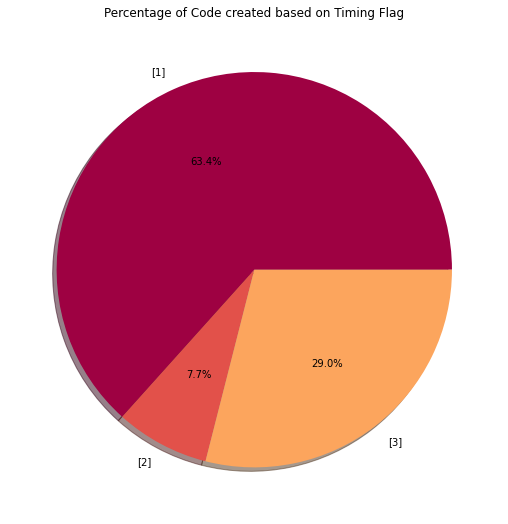

In [ ]:
from matplotlib import pyplot as plt 
import numpy as np 
from matplotlib.gridspec import GridSpec

plt.figure(1, figsize=(20,20)) 
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]

# Creating dataset 
Labels = result1[['TimingFlag']].values #['Before', 'During', 'After'] 
data = result1[['BlobHash']].values.flatten() 
perc = result1[['Percentage']].values
  
# Creating plot 
the_grid = GridSpec(2, 2)
plt.subplot(the_grid[0, 1], aspect=1, title='Percentage of Code created based on Timing Flag')
plt.pie(data, labels = Labels, autopct='%1.1f%%', shadow=True, colors=colors) 
  
# show plot 
plt.show() 

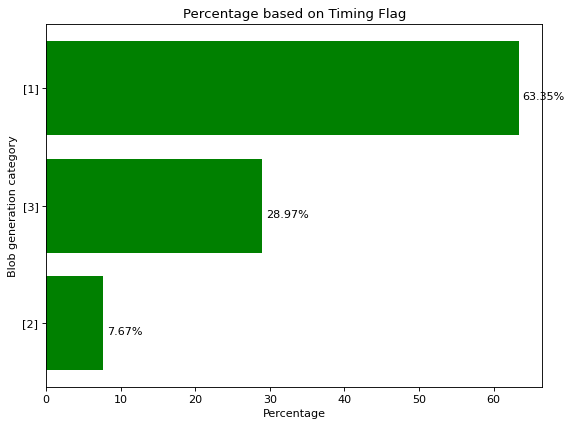

In [ ]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

x = result1.sort_values(by=['Percentage'])[['TimingFlag']].values #['During','After', 'Before']
data = result1.sort_values(by=['Percentage'])[['Percentage']].values.flatten() 

x_pos = [i for i, _ in enumerate(x)]

plt.barh(x_pos, data, color='green')
plt.ylabel("Blob generation category")
plt.xlabel("Percentage")
plt.title("Percentage based on Timing Flag")

plt.yticks(x_pos, x)

for i, v in enumerate(data):
    plt.text(v +0.5, i -0.1, str(round(v,2)) + '%', color='Black')

plt.show()

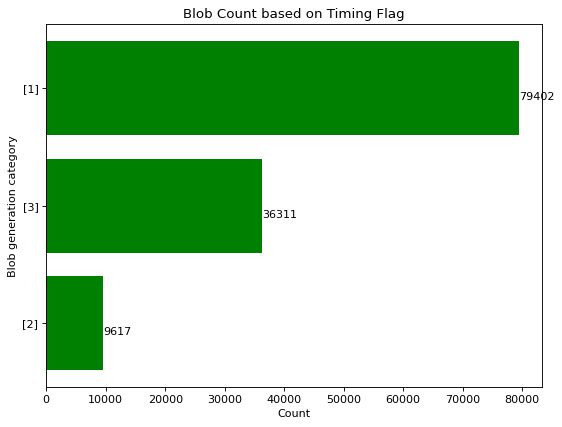

In [ ]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

x = result1.sort_values(by=['Percentage'])[['TimingFlag']].values #['During','After', 'Before']
data = result1.sort_values(by=['Percentage'])[['BlobHash']].values.flatten() 

x_pos = [i for i, _ in enumerate(x)]

plt.barh(x_pos, data, color='green')
plt.ylabel("Blob generation category")
plt.xlabel("Count")
plt.title("Blob Count based on Timing Flag")

plt.yticks(x_pos, x)

for i, v in enumerate(data):
    plt.text(v +0.5, i -0.1, str(round(v,2)) , color='Black')

plt.show()